# Demo: Non-uniform Swiss roll

This notebook demonstrates how the noisy minimum spanning tree union ($n$-MST) and $k$-nearest minimum spanning tree ($k$-MST) behave on a Swiss roll with a sampling-gap. Our goal is to find a graph with a single connected component that describes the roll's structure without shortcuts.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from umap import UMAP

from multi_mst.k_mst import KMST
from multi_mst.noisy_mst import NoisyMST
from lib.drawing import draw_graph, draw_umap, draw_force

## Swiss Roll

A (nearly) uniformly sampled 3D spiral is generated manually. Then a sampling-gap is introduced along the roll: 

In [2]:
# # Spiral length
# Nl = 500
# l_min = 2
# l_max = 25

# # Depth
# Nz = 50
# z_min = 0
# z_max = 4
# z_mid = (z_min + z_max) / 2

# # Spiralling params
# s = 0.03
# e = 2

# # Noise
# n = 0.0395

# l = np.power(np.linspace(np.power(l_min, e), np.power(l_max, e), Nl), 1/e)
# z = np.linspace(z_min, z_max, Nz)
# L, Z = np.meshgrid(l, z)
# LZ = np.vstack((L.ravel(), Z.ravel())).T

# X = s * L**e * np.cos(L)
# Y = s * L**e * np.sin(L)
# nx = X + np.random.normal(loc=0, size=L.shape, scale=n * L)
# ny = Y + np.random.normal(loc=0, size=L.shape, scale=n * L)
# nz = Z + np.random.normal(loc=0, size=L.shape, scale=n * L)
# D = np.vstack((nx.ravel(), ny.ravel(), nz.ravel())).T

# np.save('./data/generated/spiral_xyz.npy', D)
# np.save('./data/generated/spiral_lz.npy', LZ)

# l1 = 16.2
# l2 = 17.895
# l3 = 18.105
# l4 = 19.8

# mask = (
#     ((LZ_old[:, 0] >= l2) & (LZ_old[:, 0] <= l3)) | 
#     ((LZ_old[:, 0] > l1) & (LZ_old[:, 0] < l2) & ((np.abs(LZ_old[:, 1] - z_mid) / z_mid) > ((l2 - LZ_old[:, 0]) / (l2 - l1)))) |
#     ((LZ_old[:, 0] > l3) & (LZ_old[:, 0] < l4) & ((np.abs(LZ_old[:, 1] - z_mid) / z_mid) > ((LZ_old[:, 0] - l3) / (l4 - l3))))
# )
# LZ = LZ[~mask]
# D = D[~mask]

# np.save('./data/generated/spiral_gap_xyz.npy', D)
# np.save('./data/generated/spiral_gap_lz.npy', LZ)

In [3]:
# Load from ./data/generated/ instead if you want to update the spiral
D = np.load('./data/spiral_gap_xyz.npy')
LZ = np.load('./data/spiral_gap_lz.npy')

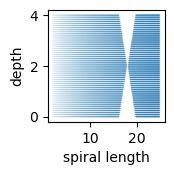

In [4]:
plt.figure(figsize=(1.7438, 1.7438))
plt.scatter(LZ[:, 0], LZ[:, 1], edgecolors='none', linewidth=0, s=1, alpha=0.2)
plt.xlabel('spiral length')
plt.ylabel('depth')
plt.subplots_adjust(.23,.24)
plt.savefig('./images/spiral_gap_params.png', dpi=600, pad_inches=0)
plt.show()

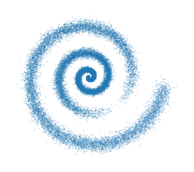

In [5]:
plt.figure(figsize=(1.7438, 1.7438))
plt.scatter(D[:, 0], D[:, 1], edgecolors='none', linewidth=0, s=1, alpha=0.2)
plt.gca().set_aspect('equal')
plt.axis('off')
plt.subplots_adjust(0, 0, 1, 1)
plt.savefig('./images/spiral_gap.png', dpi=600, pad_inches=0)
plt.show()

### UMAP

UMAP is used to demonstrate $k$-nearest neighbour network approaches on this dataset. Notice how at low values of $k$ many separate components are detected. At higher values of $k$ a single component emerges, but shortcuts are also introduced.

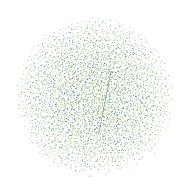

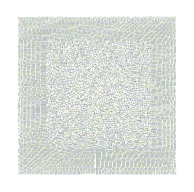

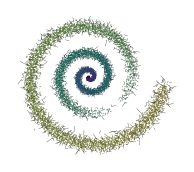

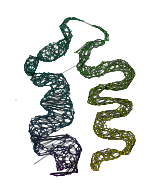

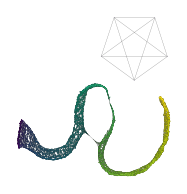

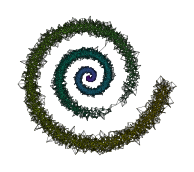

In [6]:
for k in [2, 5]:
    p = UMAP(
        n_neighbors=k, 
        init='random' if k == 2 else 'spectral',
    ).fit(D)
    draw_umap(p, color=LZ[:, 0], name='spiral_gap', alg=f'umap_{k}')
    draw_force(p, color=LZ[:, 0], name='spiral_gap', alg=f'umap_{k}')
    draw_graph(p, D[:, 0], D[:, 1], color=LZ[:, 0], name='spiral_gap', alg=f'umap_{k}')

### $k$-MST

The $k$-MST captures the global connectivity with few edges at low values of $k$:

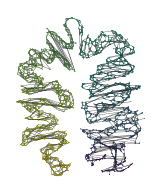

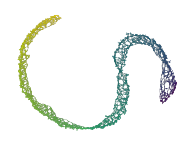

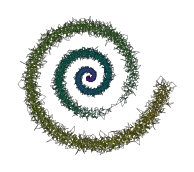

In [10]:
p = KMST(num_neighbors=2).fit(D)
draw_umap(p, color=LZ[:, 0], name='spiral_gap', alg=f'kmst_2')
draw_force(p, color=LZ[:, 0], name='spiral_gap', alg=f'kmst_2')
draw_graph(p, D[:, 0], D[:, 1], color=LZ[:, 0], name='spiral_gap', alg=f'kmst_2')

### Noisy MST

The $n$-MST behaves similarly!

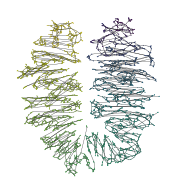

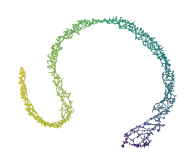

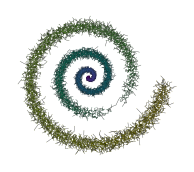

In [11]:
p = NoisyMST(num_trees=2, noise_fraction=0.6).fit(D)
draw_umap(p, color=LZ[:, 0], name='spiral_gap', alg=f'nmst_2')
draw_force(p, color=LZ[:, 0], name='spiral_gap', alg=f'nmst_2')
draw_graph(p, D[:, 0], D[:, 1], color=LZ[:, 0], name='spiral_gap', alg=f'nmst_2')